In [118]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [119]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uma_i\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
df = pd.read_csv("All_Diets.csv")
df.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44,2022-10-16,17:20:09
6,paleo,Paleo Pumpkin Pie recipes,american,30.03,275.88,97.68,2022-10-16,17:20:09
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90,2022-10-16,17:20:09
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80,2022-10-16,17:20:09
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01,2022-10-16,17:20:09


In [121]:
recipes = df["Recipe_name"]
recipes = recipes.to_numpy()
recipes[:10]

array(["Bone Broth From 'Nom Nom Paleo'",
       'Paleo Effect Asian-Glazed Pork Sides, A Sweet & Crispy Appetizer',
       'Paleo Pumpkin Pie', 'Strawberry Guacamole recipes',
       'Asian Cauliflower Fried "Rice" From \'Nom Nom Paleo\'',
       'Paleo Shrimp-Stuffed Mushrooms recipes',
       'Paleo Pumpkin Pie recipes', 'Autoimmune Paleo Pesto',
       'Baked Banana Chip Encrusted French Toast',
       'Vietnamese Pho Pressure Cooker (Noodle Soup)'], dtype=object)

In [122]:

def clean_string(input_string):
    input_string = re.sub(r"([a-zA-Z]+)'s", r'\1s', input_string)
    cleaned_string = re.sub(r'[^a-zA-Z\s]', ' ', input_string)
    return cleaned_string

clean_recipes = []
all_words = []
for recipe in recipes:
    clean_recipe = clean_string(recipe)
    words =[word.strip().lower() for word in clean_recipe.split()]
    clean_recipes.append(" ".join(words))
    all_words.extend(words)

In [123]:
clean_recipes[51:55]

['paleo pie crust recipes',
 'paleo mug cake recipes',
 'paleo flourless chocolate cake',
 'mini paleo egg bites']

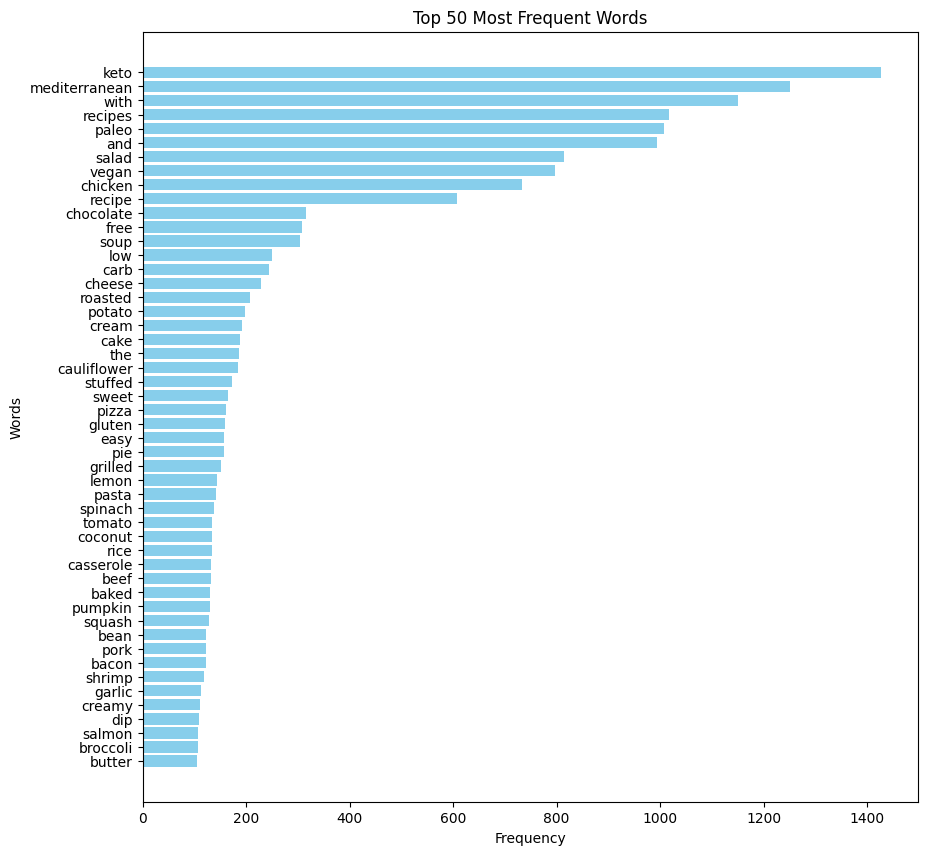

In [130]:
words, counts = np.unique(all_words, return_counts=True)

indexes_most_frequent_words = np.argsort(counts)[::-1]
most_frequent_words = words[indexes_most_frequent_words[:50]]
most_frequent_counts = counts[indexes_most_frequent_words[:50]]
plt.figure(figsize=(10, 10))
plt.barh(most_frequent_words, most_frequent_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words')
plt.gca().invert_yaxis()  
plt.show()

In [148]:
trash_words = set([word for word in "keto,mediterranean,recipes,recipe,easy,with,and,the,a".split(",")])
trash_words

{'a',
 'and',
 'easy',
 'keto',
 'mediterranean',
 'recipe',
 'recipes',
 'the',
 'with'}

In [149]:
filtred_clean_recipes  = []
all_filtered_words = []
for recipe in clean_recipes:
    words = [word for word in recipe.split()]
    filtered_words = [word for word in words if word not in trash_words]
    filtred_clean_recipes.append(" ".join(filtered_words))
    all_filtered_words.extend(filtered_words)

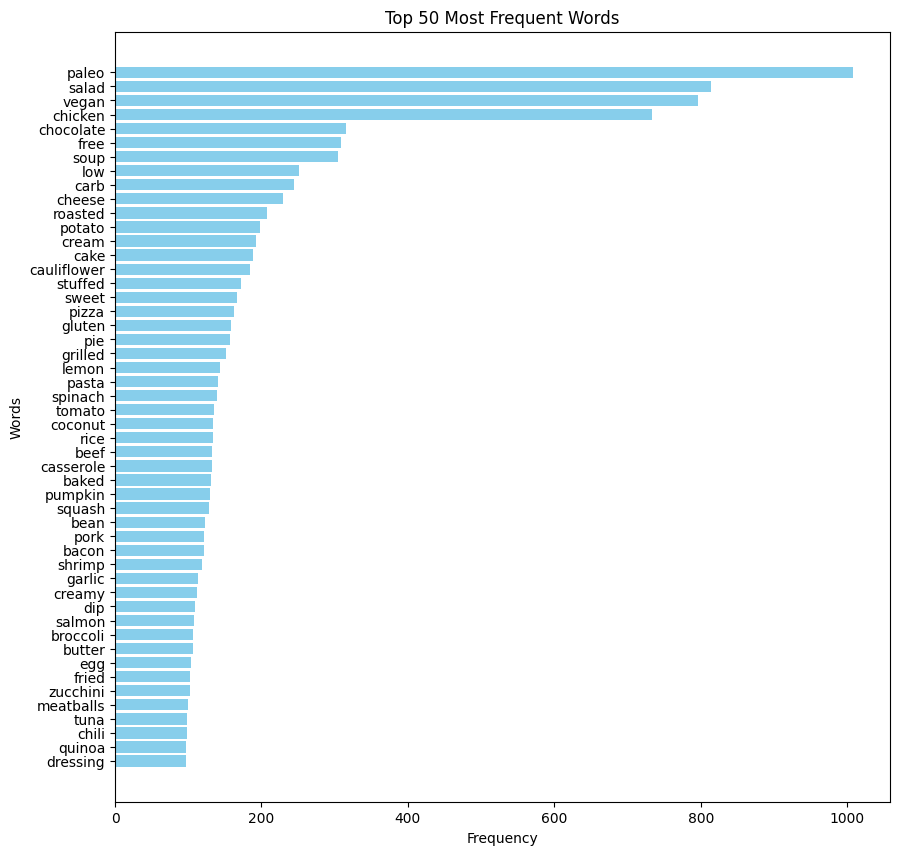

In [150]:
words, counts = np.unique(all_filtered_words, return_counts=True)

indexes_most_frequent_words = np.argsort(counts)[::-1]
most_frequent_words = words[indexes_most_frequent_words[:50]]
most_frequent_counts = counts[indexes_most_frequent_words[:50]]
plt.figure(figsize=(10, 10))
plt.barh(most_frequent_words, most_frequent_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words')
plt.gca().invert_yaxis()  
plt.show()